In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize_
import datasets
import ldle_
# Uncomment to reload a library
from importlib import reload 
visualize_ = reload(visualize_)
ldle_ = reload(ldle_)
datasets = reload(datasets)

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline
matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
noise = 0.015

In [4]:
save_dir_root = '../data/pyLDLE2/noisyswissroll_'+str(noise)+'/'

In [5]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=noise)

X.shape =  (10260, 3)


# LDLE

In [6]:
ldle = ldle_.LDLE(local_opts={'algo':'LTSA', 'gl_type':'unnorm'},
                  vis_opts={'c': labelsMat[:,0]},
                  intermed_opts={'eta_min':5},
                  print_logs=True, debug=True)

In [7]:
ldle.fit(X=X)

local_param: 0 points processed...
local_param: 2565 points processed...
local_param: 5130 points processed...
local_param: 7695 points processed...
local_param: all 10260 points processed...
Max local distortion = 691.1836568153385
Constructing intermediate views.
eta = 2.
# non-empty views with sz < 2 = 10260
#nodes in views with sz < 2 = 10260
Costs computed when eta = 2.
##############################
Time elapsed from last time log: 28.9 seconds
Total time elapsed: 28.9 seconds
##############################
Remaining #nodes in views with sz < 2 = 0
Done with eta = 2.
##############################
Time elapsed from last time log: 38.1 seconds
Total time elapsed: 67.1 seconds
##############################
eta = 3.
# non-empty views with sz < 3 = 442
#nodes in views with sz < 3 = 884
Costs computed when eta = 3.
##############################
Time elapsed from last time log: 1.3 seconds
Total time elapsed: 68.3 seconds
##############################
Remaining #nodes in views with 

In [8]:
ldle.vis.distortion(X, ldle.LocalViews.local_param_pre.zeta,
                    title='Distortion of local views')

AttributeError: 'NoneType' object has no attribute 'zeta'

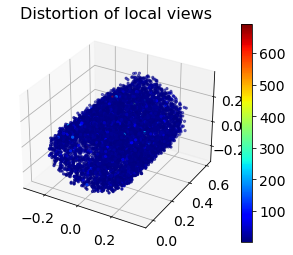

In [9]:
ldle.vis.distortion(X, ldle.LocalViews.local_param_post.zeta,
                    title='Distortion of local views')

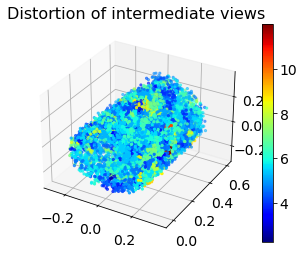

In [10]:
ldle.vis.distortion(X, ldle.IntermedViews.intermed_param.zeta[ldle.IntermedViews.c],
                    title='Distortion of intermediate views')

In [31]:
import util_
import global_reg_
util_ = reload(util_)
global_reg_ = reload(global_reg_)
import global_views_ 
global_views_ = reload(global_views_)
import copy

def stitch(init_algo, final_algo, max_internal_iter=10, noise=0):
    ldle.global_opts['to_tear'] = True
    ldle.global_opts['init_algo']['align_w_parent_only'] = True
    ldle.global_opts['init_algo']['name'] = init_algo
    ldle.global_opts['refine_algo']['name'] = final_algo
    ldle.global_opts['refine_algo']['max_internal_iter'] = max_internal_iter
    ldle.global_opts['refine_algo']['alpha'] = 0.3
    ldle.global_opts['nu'] = 3
    ldle.global_opts['vis_before_init'] = False
    ldle.global_opts['compute_error'] = True
    GlobalViews = global_views_.GlobalViews(ldle.exit_at, True, ldle.debug)
    intermed_param = copy.deepcopy(ldle.IntermedViews.intermed_param)
    if noise:
        intermed_param.noise = noise
    GlobalViews.fit(ldle.d, ldle.IntermedViews.Utilde, ldle.IntermedViews.C, ldle.IntermedViews.c,
                    ldle.IntermedViews.n_C, intermed_param, ldle.global_opts, ldle.vis, ldle.vis_opts)
    return GlobalViews

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 282 intermediate views
Ambiguous overlaps checked for 564 intermediate views
Ambiguous overlaps checked for 846 intermediate views
Ambiguous overlaps checked for 1128 intermediate views
Ambiguous overlaps checked for 1131 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 5.9 seconds
Total time elapsed: 5.9 seconds
##############################
Initial alignment of 282 views completed
Initial alignment of 564 views completed
Initial alignment of 846 views completed
Initial alignment of 1128 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.4 seconds
Total time elapsed: 6.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11391
Don

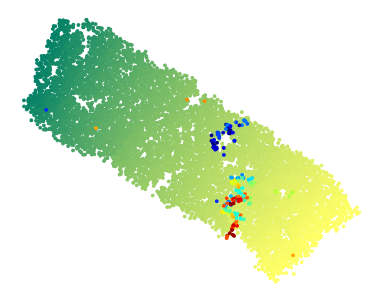

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 36.1 seconds
##############################
Done.
##############################
Time elapsed from last time log: 27.3 seconds
Total time elapsed: 63.4 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11391
Done
Alignment error: 11.936
##############################
Time elapsed from last time log: 16.8 seconds
Total time elapsed: 80.3 seconds
##############################


KeyboardInterrupt: 

In [32]:
GV_sequential = stitch('sequential', 'sequential', 10)

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 282 intermediate views
Ambiguous overlaps checked for 564 intermediate views
Ambiguous overlaps checked for 846 intermediate views
Ambiguous overlaps checked for 1128 intermediate views
Ambiguous overlaps checked for 1131 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 5.9 seconds
Total time elapsed: 5.9 seconds
##############################
Initial alignment of 282 views completed
Initial alignment of 564 views completed
Initial alignment of 846 views completed
Initial alignment of 1128 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.4 seconds
Total time elapsed: 6.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11391
Don

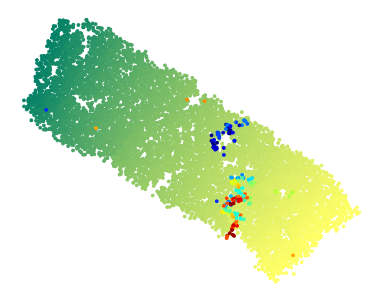

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 41.7 seconds
##############################
Done.
##############################
Time elapsed from last time log: 27.4 seconds
Total time elapsed: 69.1 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11391
Done
Alignment error: 11.936
##############################
Time elapsed from last time log: 20.9 seconds
Total time elapsed: 90.1 seconds
##############################


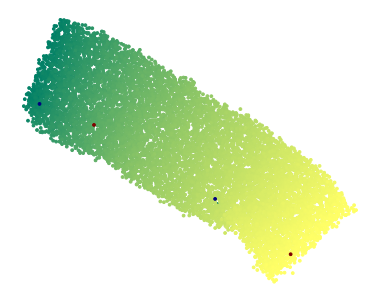

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 1
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 96.9 seconds
##############################
Done.
##############################
Time elapsed from last time log: 28.1 seconds
Total time elapsed: 124.9 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11391
Done
Alignment error: 11.977
##############################
Time elapsed from last time log: 20.7 seconds
Total time elapsed: 145.7 seconds
##############################


KeyboardInterrupt: 

In [14]:
GV_sequential = stitch('sequential', 'sequential', 10)

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 282 intermediate views
Ambiguous overlaps checked for 564 intermediate views
Ambiguous overlaps checked for 846 intermediate views
Ambiguous overlaps checked for 1128 intermediate views
Ambiguous overlaps checked for 1131 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 7.5 seconds
Total time elapsed: 7.5 seconds
##############################
Initial alignment of 282 views completed
Initial alignment of 564 views completed
Initial alignment of 846 views completed
Initial alignment of 1128 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.5 seconds
Total time elapsed: 7.9 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
D

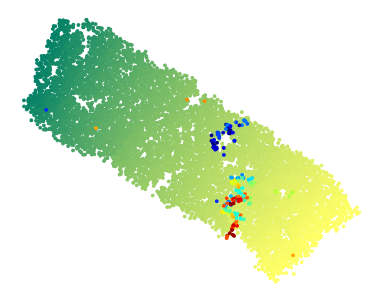

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 49.8 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Done.
##############################
Time elapsed from last time log: 39.5 seconds
Total time elapsed: 89.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 11.861
##############################
Time elapsed from last time log: 27.2 seconds
Total time elapsed: 116.5 seconds
##############################


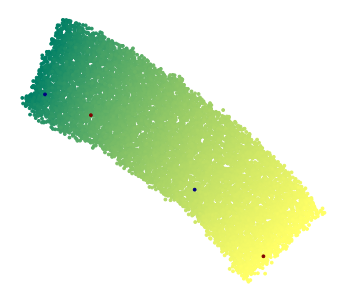

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 1
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 123.4 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Done.
##############################
Time elapsed from last time log: 35.1 seconds
Total time elapsed: 158.5 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 11.797
##############################
Time elapsed from last time log: 25.1 seconds
Total time elapsed: 183.6 seconds
##############################


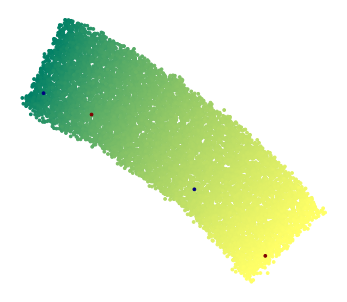

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 2
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 190.3 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Done.
##############################
Time elapsed from last time log: 34.7 seconds
Total time elapsed: 225.0 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 11.807
##############################
Time elapsed from last time log: 25.0 seconds
Total time elapsed: 250.0 seconds
##############################


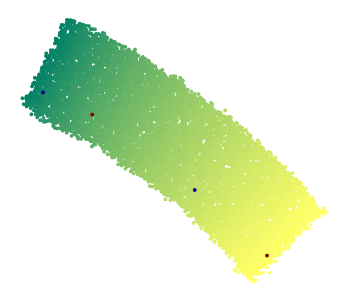

In [48]:
GV_retraction = stitch('sequential', 'retraction', 100)

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 282 intermediate views
Ambiguous overlaps checked for 564 intermediate views
Ambiguous overlaps checked for 846 intermediate views
Ambiguous overlaps checked for 1128 intermediate views
Ambiguous overlaps checked for 1131 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 6.1 seconds
Total time elapsed: 6.1 seconds
##############################
Initial alignment of 282 views completed
Initial alignment of 564 views completed
Initial alignment of 846 views completed
Initial alignment of 1128 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.4 seconds
Total time elapsed: 6.4 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
D

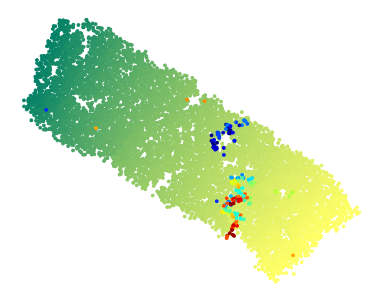

Refining with spectral algorithm for 10 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 44.5 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Computing eigh(C,k=d)
Done.
Done.
##############################
Time elapsed from last time log: 27.7 seconds
Total time elapsed: 72.2 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 14.706
##############################
Time elapsed from last time log: 24.3 seconds
Total time elapsed: 96.5 seconds
##############################


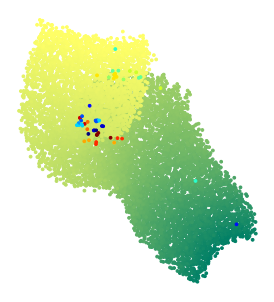

Refining with spectral algorithm for 10 iterations.
Refinement iteration: 1
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 103.2 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Computing eigh(C,k=d)
Done.
Done.
##############################
Time elapsed from last time log: 29.1 seconds
Total time elapsed: 132.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 15.531
##############################
Time elapsed from last time log: 26.9 seconds
Total time elapsed: 159.2 seconds
##############################


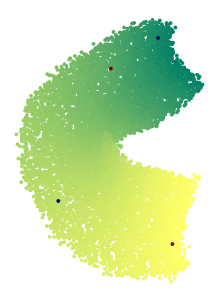

Refining with spectral algorithm for 10 iterations.
Refinement iteration: 2
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 166.0 seconds
##############################
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Computing eigh(C,k=d)
Done.
Done.
##############################
Time elapsed from last time log: 33.3 seconds
Total time elapsed: 199.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of size 11391
m_1: 1
Done
Alignment error: 14.273
##############################
Time elapsed from last time log: 26.2 seconds
Total time elapsed: 225.5 seconds
##############################


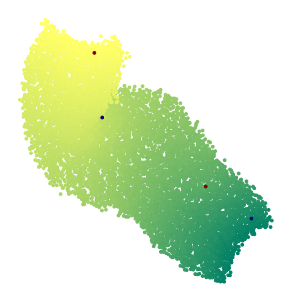

In [49]:
GV_spectral = stitch('sequential', 'spectral')

In [53]:
from matplotlib import pyplot as plt
def plot_err_vs_time(tracker, title, label=''):
    t = [0]
    err = [tracker['init_err']]
    for i in range(tracker['refine_iter_start_at'].shape[0]):
        t.append(t[-1] + tracker['refine_iter_done_at'][i]-tracker['refine_iter_start_at'][i])
        err.append(tracker['refine_err_at_iter'][i])
    plt.plot(t[0:], err[0:], '-o', label=label)
    plt.title(title)
    plt.xlabel('time (sec)')
    plt.ylabel('error = tr$(CO^{(k)^T}O^{(k)})$')

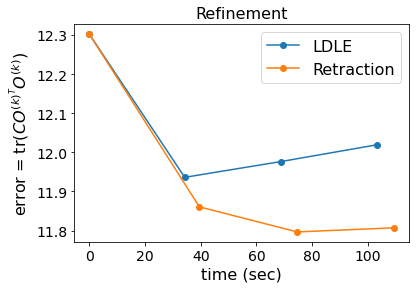

In [56]:
plot_err_vs_time(GV_sequential.tracker, 'Refinement', 'LDLE')
plot_err_vs_time(GV_retraction.tracker, 'Refinement', 'Retraction')
#plot_err_vs_time(GV_spectral.tracker, 'Refinement', 'Spectral')
plt.legend()

In [57]:
import multiprocessing

multiprocessing.cpu_count()

8

In [86]:
import numpy as np
from numba import jit

@jit
def f_(b):
    a = np.zeros(b.shape[0])
    for i in range(b.shape[0]):
        a[i] = 2*(b[i])
    return a

In [87]:
n=100000000
b = np.arange(n)
f_(b)

array([0.00000000e+00, 2.00000000e+00, 4.00000000e+00, ...,
       1.99999994e+08, 1.99999996e+08, 1.99999998e+08])

In [62]:
!pip install numba